In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [31]:
df = pd.read_csv('fods_1.csv')
print(len(df))

546


In [32]:
def normalize(X):
    mean = np.mean(X,axis=0)
    sd = np.std(X,axis=0)
    X = (X-mean)/sd
    return X

In [33]:
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [34]:
#shuffle dataset and split into 80-20 train test
def initialize():
    global df
    df = df.sample(frac=1)
    length = (df.shape[0] * 1)
    length = int(length)
    X_train = normalize(np.array(df.iloc[0:length,0:2]))
    Y_train = (np.array(df.iloc[0:length,[2]]))
    X_train = X_train.T
    Y_train = Y_train.T
    return X_train,Y_train

In [35]:
X_train,Y_train = initialize()

In [36]:
X_train.shape

(2, 546)

In [37]:
#Applying gradient descent on training data.Returns all updates of weights,losses.
def gradient_descent(X,y,alpha=0.01,n_iters=1000):
    J_history = []
    w1 = []
    w2 = []
    w = np.zeros((1,2))
    for i in range (n_iters):
        y_pred = np.dot(w,X)
        loss = np.average((y_pred - y) ** 2) / 2
        grad1 = np.average(np.multiply(y_pred-y,X[0]))
        grad2 = np.average(np.multiply(y_pred-y,X[1]))
        w1.append(w[0][0])
        w2.append(w[0][1])
        J_history.append(loss)
        w[0][0] = w[0][0] - alpha*grad1
        w[0][1] = w[0][1] - alpha*grad2
    return w1,w2,J_history


In [38]:
w1_updates,w2_updates,J_history = gradient_descent(X_train,Y_train)
len(w1_updates)

1000

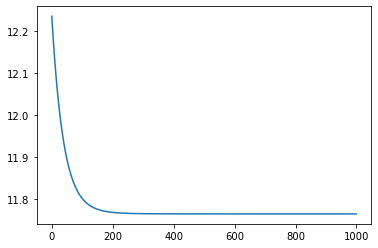

In [39]:
plt.plot(J_history)

In [40]:
J_history[-1]

11.765531681081677

In [41]:
J_history = np.array(J_history)
J_history[999] # OPtimal J value

11.765531681081677

In [42]:
# returns unregularized cost computed for a list of weights and return array dimension same as input weights dimension.
def unregularized_cost(w1,w2):
    m = X_train.shape[1]
    ans=[]
    for j in range(w1.shape[0]):
        ans.append(np.sum((w1[j]*X_train[0,:]+w2[j]*X_train[1,:]-Y_train[0,:])**2)/2)
    return np.array(ans).reshape(len(ans),1)

In [43]:
w1_updates = np.array(w1_updates).reshape(len(w1_updates),1)
w2_updates = np.array(w2_updates).reshape(len(w2_updates),1)

In [61]:
x = np.arange(-2,2,0.005)
y = np.arange(-2,2,0.005)
X, Y = np.meshgrid(x, y)
print(X.shape)
print(Y.shape)

Z = unregularized_cost(X.flatten(), Y.flatten()).reshape(X.shape[0],X.shape[1])
Z.shape

(800, 800)
(800, 800)


(800, 800)

In [62]:
print(w1_updates[999])#optimal w for unregularized

[0.759433]


In [63]:
print(w2_updates[999])

[0.40167586]


In [64]:
#used for finding path that weights follow to reach minima
def in_range(r,q,thre=0.005):
    points1 = []
    points2 = []
    for i in range(len(w1_updates)):
        if abs(w1_updates[len(w1_updates)-i-1])**q+abs(w2_updates[len(w1_updates)-i-1])**q <= r+thre and abs(w1_updates[len(w1_updates)-i-1])**q+abs(w2_updates[len(w1_updates)-i-1])**q >= r-thre:
            points1.append(w1_updates[len(w1_updates)-i-1])
            points2.append(w2_updates[len(w1_updates)-i-1])
    return points1,points2

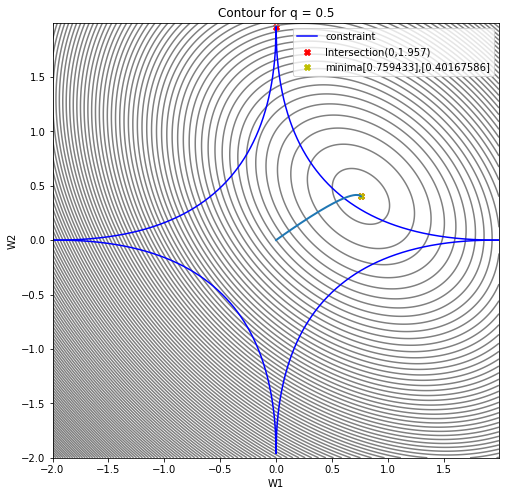

In [65]:
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z, colors='gray',levels=120)
plt.title("Contour for q = 0.5")
plt.xlabel("W1")
plt.ylabel("W2")
d1 = np.arange(-2,2,0.005)
d2 = (1.4 - (abs(d1) ** 0.5))**2
plt.plot(d1,d2,'b',label = 'constraint')
d1 = np.arange(-2,2,0.005)
d2 = -1 * ((1.4 - (abs(d1) ** 0.5))**2)
plt.plot(d1,d2,'b')
plt.scatter([0],[1.957],color='#FF0000',marker='X',label = "Intersection(0,1.957)")
plt.scatter(w1_updates[999],w2_updates[999],color='#FF0000',marker='X')
plt.scatter(w1_updates[999],w2_updates[999],color='y',marker='X',label = f'minima{w1_updates[999]},{w2_updates[999]}')
plt.legend()
plt.plot(w1_updates,w2_updates,linewidth=2)

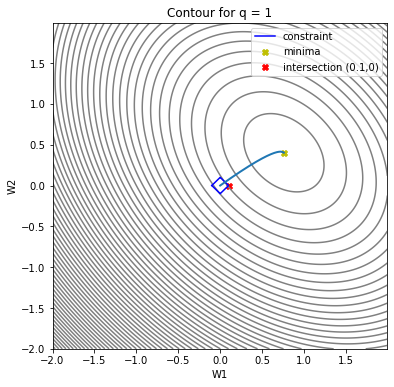

In [67]:
plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, colors='gray',levels=70)
plt.title("Contour for q = 1")
plt.xlabel("W1")
plt.ylabel("W2")
d1 = np.arange(-0.1,0.1,0.005)
d2 = 0.1-abs(d1)
plt.plot(d1,d2,'b',label = 'constraint')
d1 = np.arange(-0.1,0.1,0.005)
d2 = -1 * (0.1-abs(d1))
plt.plot(d1,d2,'b')
plt.plot(w1_updates,w2_updates,linewidth=2)
r,s=in_range(0.1,1,0.001)
plt.scatter(w1_updates[999],w2_updates[999],color='y',marker='X',label = 'minima')
plt.scatter([0.10],[0],color='#FF0000',marker='X',label = 'intersection (0.1,0)')
plt.legend()

(array([0.15170598]), array([0.10857699]))

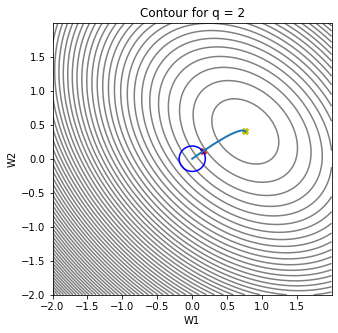

In [78]:
plt.figure(figsize=(5,5))
plt.contour(X, Y, Z, colors='gray',levels=70)
plt.title("Contour for q = 2")
plt.xlabel("W1")
plt.ylabel("W2")
radius=0.035**0.5
d1 = np.arange(-radius,radius,0.0005)
d2 = (0.035-abs(d1)**2)**0.5
plt.plot(d1,d2,'b',label = 'constraint')
d1 = np.arange(-radius,radius,0.0005)
d2 = -1 * (0.035-abs(d1)**2)**0.5
plt.plot(d1,d2,'b')
plt.plot(w1_updates,w2_updates,linewidth=2)
r,s=in_range(0.035,2,0.001)
plt.scatter([r[0]],[s[0]],color='#FF0000',marker='X')
plt.scatter(w1_updates[999],w2_updates[999],color='y',marker='X',)
r[0],s[0]

(array([0.49356562]), array([0.32782655]))

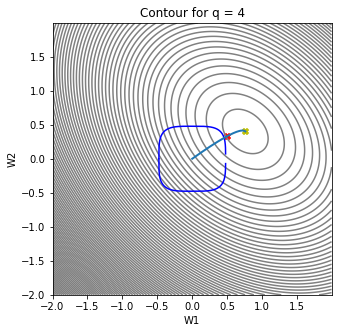

In [84]:
plt.figure(figsize=(5,5))
plt.contour(X, Y, Z, colors='gray',levels=100)
plt.title("Contour for q = 4")
plt.xlabel("W1")
plt.ylabel("W2")
radius=0.052**0.25
d1 = np.arange(-radius,radius,0.0005)
d2 = (0.052-abs(d1)**4)**0.25
plt.plot(d1,d2,'b')
d1 = np.arange(-radius,radius,0.0005)
d2 = -1 * (0.052-abs(d1)**4)**0.25
plt.plot(d1,d2,'b')
plt.plot(w1_updates,w2_updates,linewidth=2)
r,s=in_range(0.052,4,0.02)
plt.scatter([r[0]],[s[0]],color='#FF0000',marker='X')
plt.scatter(w1_updates[999],w2_updates[999],color='y',marker='X')
r[0],s[0]

In [80]:
def MSE(w1,w2):
    temp=np.average(((w1*X_train[0,:]+w2*X_train[1,:]-Y_train))**2)
    return temp

In [81]:
MSE(0,1.957)

25.75500183019629

In [82]:
MSE(0.1,0)

24.300566077481093

In [83]:
MSE(0.15,0.108)

24.105860157325562

In [85]:
MSE(0.49,0.32)

23.624774662132026